# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Цель исследования
Для последующей автоматизации системы по отслеживанию аномалий и мошеннической деятельности необходимо:
1. установить, какие параметры влияют на стоимость недвижимости;
2. определить рыночную стоимость объектов недвижимости.

Чтобы это сделать нужно ответить на ряд основных вопросов:
1. как быстро продаются квартиры?
2. какие факторы больше всего влияют на общую (полную) стоимость объекта?
3. какие населённые пункты с самой высокой и низкой стоимостью квадратного метра?
4. какая средняя цена каждого километра до центра?

#### Ход исследования
Чтобы провести корректно исследование и ответить на поставленные вопросы, необходимо выполнить следующие шаги:
1. провести предобработку данных (удалить явные и неявные дубликаты, восполнить недостающие значения, исключить выбросы);
2. добавить дополнительные данные, если требуется;
3. провести анализ рынка недвижимости по г. Санкт-Петербургу;
4. провести анализ рынка недвижимости по Ленинградской области;
5. написать итоговый вывод и рекоммендации.



### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
print('\nЧисло явных дубликатов:', data.duplicated().sum(), '\n',
     '\nКоличество пропусков:', '\n', data.isna().sum(), '\n',
     '\nОбщая информация:')
data.info()


Число явных дубликатов: 0 
 
Количество пропусков: 
 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64 
 
Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

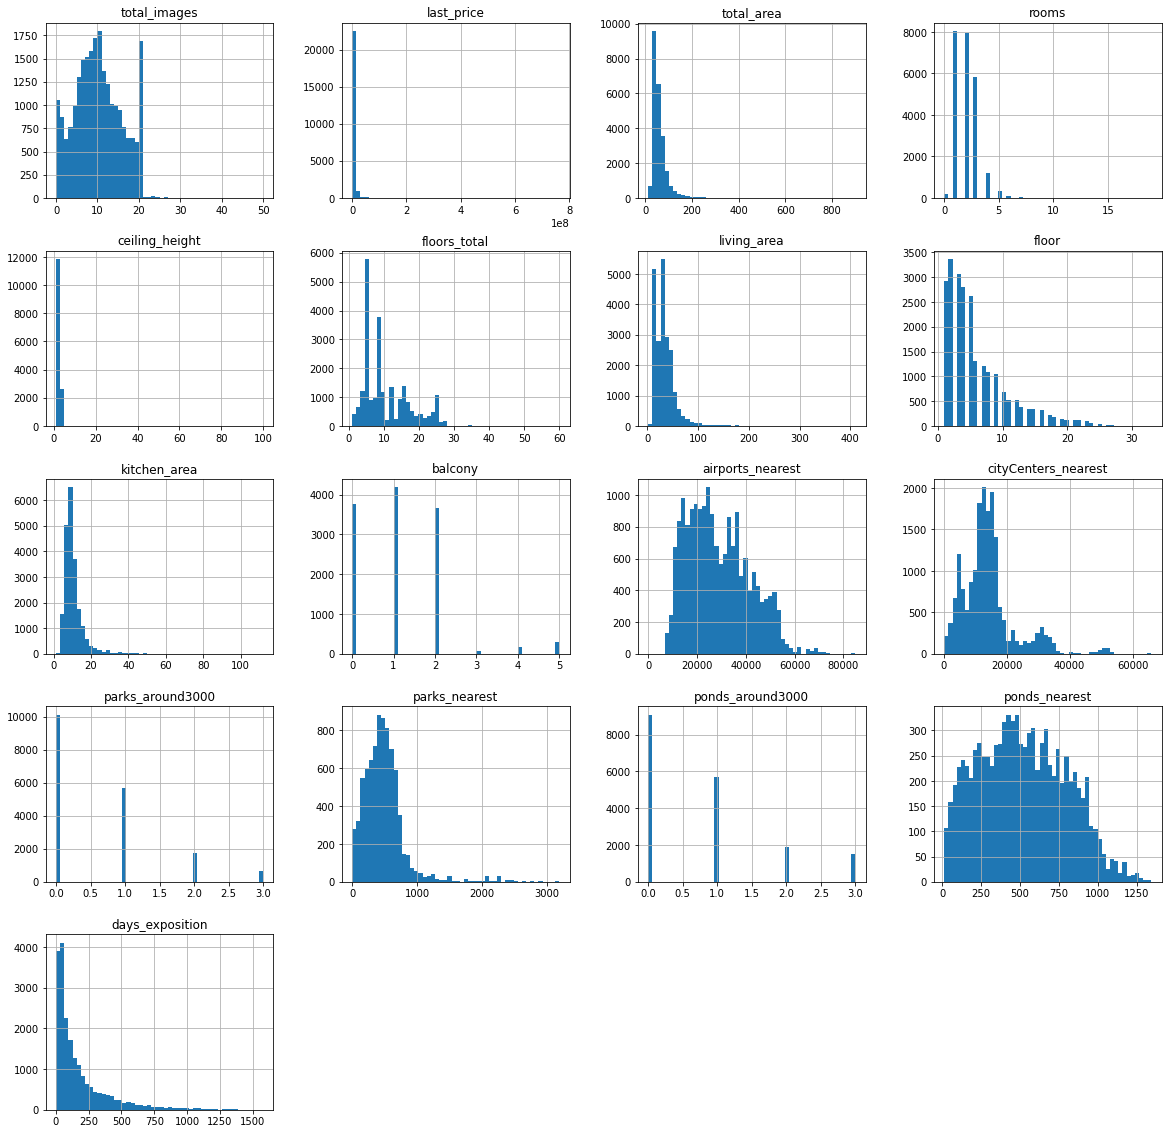

In [5]:
#строю первичные гистограммы для предвартельной оценки данных 
data.hist(bins=50, figsize=(20,20))

#### Вывод

Явных дубликатов нет, в некоторых столбцах пропущены значения, некорректный тип данных и есть аномальные значения

### Предобработка данных

#### Приведение значений к корректному типу данных

In [6]:
#Создаю функцию для заполнения пропущенных значений на 0
def fillna_func(df, column):
    df[column] = df[column].fillna(value=0)
    return df[column]

#цикл для применения функции заполнения пропущенных значений на 0 
fillna_list = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']
for q in fillna_list:
    data[q] = fillna_func(data, q)

#Создаю функцию для изменения типа на int
def int_func(df, column):
    df[column] = df[column].astype(int)
    return df[column]

#цикл для применения функции замены типа на int
int_list = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']
for q in int_list:
    data[q] = int_func(data, q)

#Привожу аппартаменты к формату bool
data['is_apartment'] = data['is_apartment'].astype(bool)
    
#Привожу дату публикации к формату datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#Проверка замены значений
print('\nКоличество пропусков:', '\n', data.isna().sum(), 
      '\n', '\nОбщая информация:')
data.info()


Количество пропусков: 
 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64 
 
Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64        

##### Вывод
Заполнила пропуски значением 0.
Заменила дробные значения там, где это неуместно (балконы, этажи и тп.).
Привела формат даты к datatype чтобы в дальнейшем с ним было удобно работать. 

#### Удаление некорректных значений

In [7]:
#Удаляю записи без локации, так как восстановить локацию невозможно
data.dropna(subset=['locality_name'], inplace=True)

#Удаляю записи где количество этажей неизвестно, так как восстановить количество этажей невозможно
data['floors_total'] = data['floors_total'].dropna()

#### Удаление неявных дубликатов

In [8]:
#Изучаю все уникальные названия
was = len(data['locality_name'].sort_values().unique())
print('Было: всего уникальных значений', was)

#Заменяю "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё','е', regex=True)

#Исключаю из названий местности любые указания на тип местности, чтобы охватить максимальное количество дубликатов
data['locality_name'] = data['locality_name'].replace(['городской поселок',
     'коттеджный поселок',
     'поселок городского типа',
     'поселок при железнодорожной станции',
     'поселок станции',
     'село',
     'поселок',
     'садоводческое некоммерческое товарищество', 
     'садовое товарищество',
     'деревня',
     'поп.к', 'по к', 'пок'], '', regex=True)

#Так как замена значений произошла на пробел, удаляю лишний пробел перед названием
data['locality_name'] = data['locality_name'].str.strip()

#Проверяю исправления
present = len(data['locality_name'].unique())
print('Стало: всего уникальных значений', present )
print('Разница:' , was - present)

Было: всего уникальных значений 364
Стало: всего уникальных значений 315
Разница: 49


##### Вывод 
Неявные дубликаты исправлены.

#### Заполнение недостающих значений

In [9]:
#Медианные значения.
#Высоту потолков заполняю медианным значением, 
#так как эти данные будут соответствовать большинству реальных значений
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [10]:
#Функция среднего значения.
def ratio_func (df, col1, col2):
    rations = df[col1].mean() / df[col2].mean()
    df[col1].fillna(rations * df[col2], inplace=True)
    return df[col1]

#Применяю к жилой площади и площади кухни, так как для жилой площади и кухни будут наиболее актульны средние значения,
#чем медианные, так как у нас не известны типы домов по которым можем медиану вывести или неизвестна нежилая площадь в виде коридоров, туалетов и подсобок, 
#чтобы на разнице значений заполнить площадь кухни или жилой площади
ratio_list = ['living_area', 'kitchen_area']
for q in ratio_list:
    data[q] = ratio_func(data, q, 'total_area')

In [11]:
#Расстояния. Восстановить значения можно, если для другой строчки в столбце ['locality_name'] указано значение. 
#Возможно появление предупреждения о том, что работаю с пустым диапазоном

def distance_func (df, col1, col2):
    for i in df[col1].unique(): 
        df.loc[(df[col1] == i) & (df[col2].isna()), col2] = \
        df.loc[(df[col1] == i), col2].median()
        return df[col2]

#Применяю к актуальным столбцам, где указаны расстояния:
distance_list = ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'parks_around3000', 'ponds_nearest', 'ponds_around3000']
for q in distance_list:
    data[q] = distance_func(data, 'locality_name', q)

#возвращаю корректный тип данных для количества парков и прудов
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [12]:
#исправляю некорректные данные для высоты потолков
for q in data['ceiling_height']:
    data.loc[(data['ceiling_height'] >= 22.0) & (data['ceiling_height'] <= 40.0), 'ceiling_height'] = \
    data.loc[(data['ceiling_height'] >= 22.0), 'ceiling_height'] / 10

In [13]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,True,...,11.000000,2,пок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,True,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.790205,9,True,...,27.848234,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


##### Вывод
Недостающие значения, где возможно, добавлены в таблицу. 

#### Удаление аномальных значений

In [14]:
#Делаю функцию для исключения выбросов по межквартильному правилу (1.5 размаха) 
#чтобы очистить таблицу от явных выбросов
def features_func(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq


features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for q in features:
    data[q] = features_func(data, q)

#привожу в соответствие тип
data['rooms'] = data['rooms'].fillna(0).astype(int)

#Изучаю изменения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.159500e+04,22406.000000,23650.000000,20702.000000,23650.000000,22764.000000,23650.000000,22329.000000,23650.000000,18201.000000,18200.000000,23650.000000,16501.000000,23650.000000,16823.000000,18790.000000
mean,9.862326,4.838942e+06,54.325685,2.012896,2.631191,10.637505,31.520641,5.893277,9.420630,0.591712,28793.672188,14191.313764,0.469091,475.066905,0.590359,511.132854,128.276264
std,5.682278,2.217282e+06,19.349559,0.986849,0.081377,6.613891,13.755649,4.883317,3.181018,0.959662,12608.540882,8593.135557,0.748458,239.957052,0.883539,204.310416,120.980920
min,0.000000,1.219000e+04,12.000000,0.000000,2.460000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18616.000000,9267.000000,0.000000,459.000000,0.000000,473.000000,41.000000
50%,9.000000,4.400000e+06,50.100000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.500000,13073.000000,0.000000,460.000000,0.000000,503.000000,85.000000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.650000,16.000000,40.592160,8.000000,11.000000,1.000000,37242.000000,16281.250000,1.000000,460.000000,1.000000,534.000000,182.000000
max,50.000000,1.189440e+07,114.200000,5.000000,2.850000,60.000000,76.700000,33.000000,19.450000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,509.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            21595 non-null  float64       
 2   total_area            22406 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        20702 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           22764 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          22329 non-null  float64       
 13  balcony         

##### Вывод
Данные в таблице стали более правдоподобными благодаря тому, что проведена работа по восполнению недостающих значений и удалены аномальные значения, которые могут внести искажения в адекватную оценку рынка недвижимости. 

#### Добавление столбцов в таблицу

In [16]:
#Добавляю столбец со стоимостью квадратного метра ['price_m2']
data['price_m2'] = data['last_price'] / data['total_area']

In [17]:
#Добавляю столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [18]:
#Создаю функцию для заполнения нового столбца с типом этажа
def floors(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floors, axis=1)

In [19]:
#Столбец с расстоянием до центра в км, округляю до целого
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)

In [20]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_type,center_km
0,20,NaN,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2,755.0,NaN,NaN,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2,574.0,NaN,92785.714286,3,8,2015,другой,13
3,0,NaN,NaN,2015-07-24,3,2.65,14,NaN,9,True,...,84.0,3,234.0,424.0,NaN,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-19,2,NaN,14,32.0,13,True,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8


##### Вывод
Дополнила данные таблицы значением цены квадратного метра, стобцы дней недели, месяцев и годов, добавила дополнительно столбец с типом этажа и расстояние до центра. Эти данные необходимы, чтобы провести исследовательский анализ данных и дать ответы на вопросы: 


как быстро продавались квартиры?


какие факторы больше всего влияют на общую (полную) стоимость объекта? 


какие населённые пункты с самой высокой и низкой стоимостью квадратного метра?


какая средняя цену каждого километра до центра?

### Проведите исследовательский анализ данных

#### Изучение и описание параметров квартир

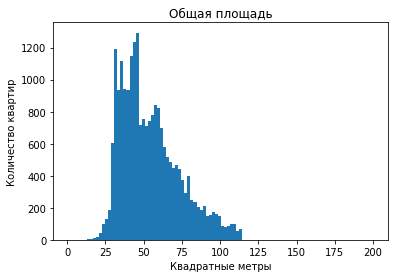

Наибольшие по площади варианты:
5978     114.2
19021    114.2
4657     114.2
20477    114.2
1170     114.2
5853     114.1
6729     114.0
19959    114.0
8249     114.0
9701     114.0
Name: total_area, dtype: float64


In [21]:
#Общая площадь
plt.hist(data['total_area'], bins=100, range=(1,200))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))

Видны значительные пики между 30 и 50кв.метрами. Для более внимательного изучения, нужно приблизить данные.

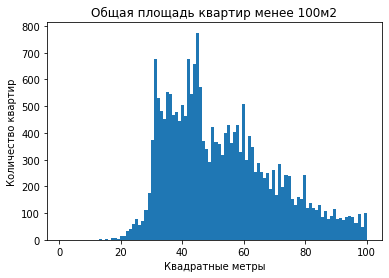

In [22]:
#Общая площадь квартир менее 100м2
plt.hist(data['total_area'], bins=100, range=(1,100))
plt.title('Общая площадь квартир менее 100м2')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

В основном квартиры не менее 30м2 и не более 100м2. Основные пики приходятся на квартиры 30, 45 и 60м2. Есть аномальные значения более 200м2


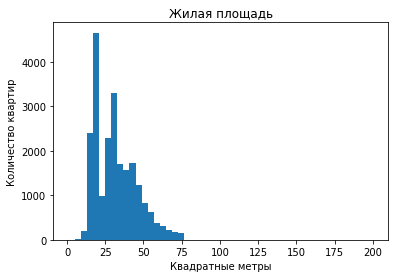

Наибольшие по жилой площади варианты:
8470     76.700000
18109    76.650000
14540    76.515015
8533     76.515015
7091     76.515015
8933     76.500000
16618    76.500000
7202     76.400000
9361     76.400000
688      76.400000
Name: living_area, dtype: float64


In [23]:
#Жилая площадь
plt.hist(data['living_area'], bins=50, range=(1,200))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))


В основном жилая площадь от 15 до 50 метров. После 80 метров встречаются единичные случаи. Есть аномальные значения более 150м2. Также видно два пика, скорее всего первый пик для однушек, второй для двушек.

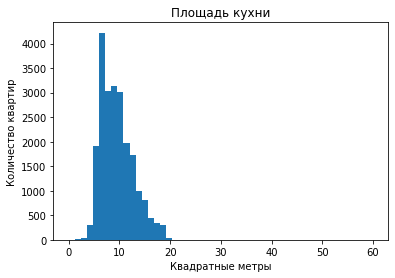

Наибольшие по площади кухни варианты:
9448     19.45000
16505    19.44122
8286     19.42000
15365    19.40000
9723     19.40000
8901     19.40000
14212    19.40000
3056     19.40000
417      19.40000
6721     19.40000
Name: kitchen_area, dtype: float64


In [24]:
#Площадь кухни
plt.hist(data['kitchen_area'], bins=50, range=(0,60))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

В основном площадь кухни от 5 до 15 метров. Есть аномальные значения более 30м2. Это могут быть объединенные кухни с гостиной.

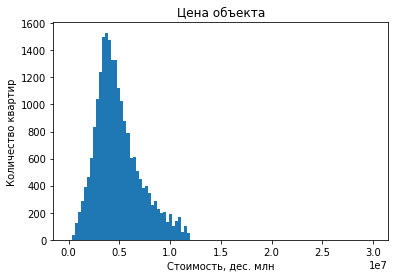

Наибольшие по цене варианты:
17738    11894400.0
13701    11880000.0
20860    11879250.0
3165     11866860.0
21860    11858000.0
12437    11850000.0
10068    11840000.0
19454    11820000.0
20193    11809670.0
14422    11800000.0
Name: last_price, dtype: float64


In [25]:
#Цена объекта
plt.hist(data['last_price'], bins=100, range=(0,30000000))
plt.title('Цена объекта')
plt.xlabel('Стоимость, дес. млн')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

Основной пик стоимости квартир в районе 5 миллионов. Дороже 10млн квартир уже мало. Есть аномальные значения более 100млн.

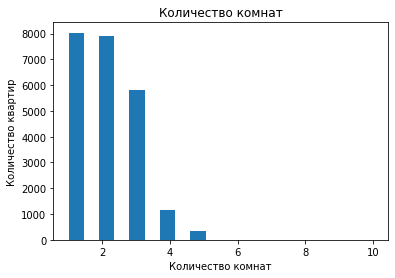

Наибольшие по числу комнат варианты:
22254    5
13289    5
11774    5
8077     5
19977    5
18633    5
11765    5
14706    5
21426    5
12055    5
Name: rooms, dtype: int64


In [26]:
#Количество комнат
plt.hist(data['rooms'], bins=20, range=(1,10))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))

Примерно поровну квартир с 1 и 2 комнатами, чуть меньше 3. Есть небольшая доля квартир с четырьмя комнатами. Есть аномальные значения более 7 комнат.

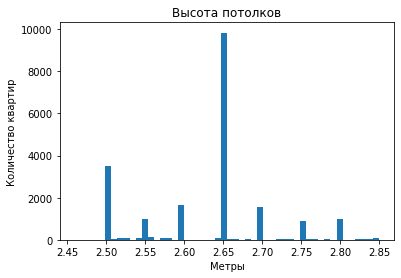

Наибольшие по высоте потолков варианты:
4211     2.85
1210     2.85
21285    2.85
8180     2.85
16919    2.85
19695    2.85
22212    2.85
12837    2.85
21745    2.85
22662    2.85
Name: ceiling_height, dtype: float64


In [27]:
#Высота потолков
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=50)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Есть аномальные значения более 4м. Так же есть значения с высотой потолка 27 метров. Скорее всего здесь ошибка в данных и значение должно быть 2,7.

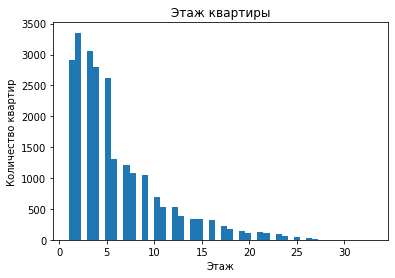

Наибольшие по этажу варианты:
18218    33
11575    32
18629    31
1917     30
11079    29
397      28
6157     27
13276    27
4091     27
23292    27
Name: floor, dtype: int64


In [28]:
#Этаж квартиры
plt.hist(data['floor'], bins=50)
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по этажу варианты:')
print(data['floor'].sort_values(ascending=False).head(10))

Большинство квартир продаются с 1 по 10 этажи. С 15 этажа квартир продаётся очень мало. Вероятно это связано с типовой застройкой. Также есть небольшие пики на 12 этаже, 15 и 25. После 25 этажа квартиры практически не продаются. Есть аномальные значения после 30 этажа.

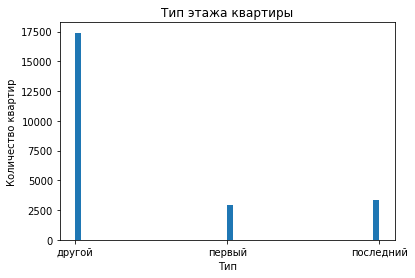

In [29]:
#Тип этажа квартиры
plt.hist(data['floor_type'], bins=50)
plt.title('Тип этажа квартиры')
plt.xlabel('Тип')
plt.ylabel('Количество квартир')
plt.show()

тип этажа квартиры («первый», «последний», «другой») Большинство квартир продаётся на других этажах. Первый и последний примерно одинаковое количество.

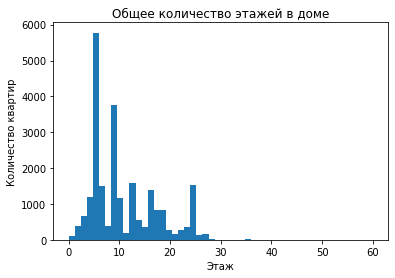

Наибольшие по количеству этажей варианты:
2253     60
16731    52
16934    37
5807     36
11079    36
397      36
1917     35
15982    35
12960    35
9579     35
Name: floors_total, dtype: int64


In [30]:
#Общее количество этажей в доме
plt.hist(data['floors_total'], bins=50)
plt.title('Общее количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по количеству этажей варианты:')
print(data['floors_total'].sort_values(ascending=False).head(10))

Есть два пика, на 5 этажных домах и на домах в 9 этажей. Вероятно это также связана с типовой застройкой.

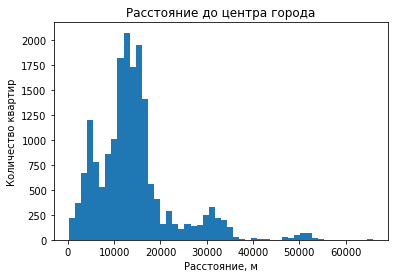

Ближайшие к центру:
13694    181.0
1182     208.0
8614     215.0
1934     287.0
20873    291.0
11492    318.0
1109     318.0
10377    318.0
5297     318.0
11723    318.0
Name: cityCenters_nearest, dtype: float64


In [31]:
#Расстояние до центра горда в метрах
plt.hist(data['cityCenters_nearest'], bins=50)
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()
print('Ближайшие к центру:')
print(data['cityCenters_nearest'].sort_values().head(10))

Основной пик квартир между 10 и 20км. Также наблюдается небольшой пик квартир в пределах 5км от центра. Квартиры дальше 20км от центра практически отстствуют.

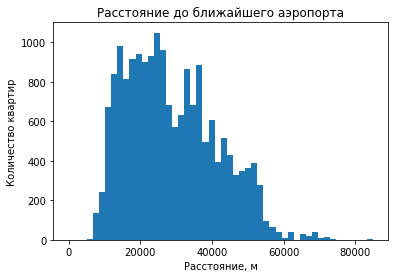

Ближайшие к аэропорту:
21085       0.0
4017     6450.0
12899    6450.0
7778     6914.0
23150    6949.0
15633    6989.0
22283    6989.0
11294    6989.0
5074     6989.0
5062     6989.0
Name: airports_nearest, dtype: float64


In [32]:
#Расстояние до ближайшего аэропорта
plt.hist(data['airports_nearest'], bins=50)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()
print('Ближайшие к аэропорту:')
print(data['airports_nearest'].sort_values().head(10))

расстояние до ближайшего аэропорта Основной пик приходится на диапазон от 10 до 35км

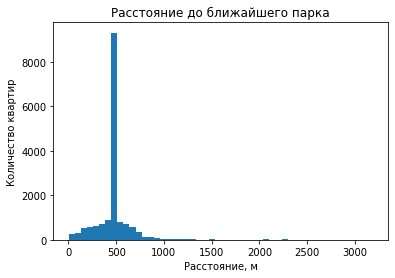

Ближайшие к парку:
14624     1.0
11949     3.0
22941     4.0
9344      7.0
20193     9.0
2527      9.0
4470     10.0
21773    10.0
189      10.0
214      10.0
Name: parks_nearest, dtype: float64


In [33]:
#Расстояние до ближайшего парка
plt.hist(data['parks_nearest'], bins=50)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()
print('Ближайшие к парку:')
print(data['parks_nearest'].sort_values().head(10))

расстояние до ближайшего парка Значительный пик квартир имеет расстояние до ближайшего парка не более 500м. Есть аномальные значения более 1500м.

Text(0, 0.5, 'Количество объявлений')

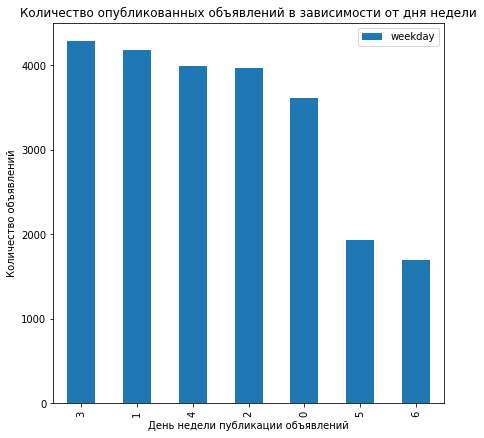

In [34]:
#день публикации объявления
data['weekday'].value_counts().plot.bar(figsize=(7, 7), legend=True)
plt.title('Количество опубликованных объявлений в зависимости от дня недели')
plt.xlabel('День недели публикации объявлений')
plt.ylabel('Количество объявлений')

Больше всего объявлений публикуют в середине недели. Самое большое количество в четверг. Заметно меньше ближе к выходным и меньше всего в воскресенье. 

Text(0, 0.5, 'Количество объявлений')

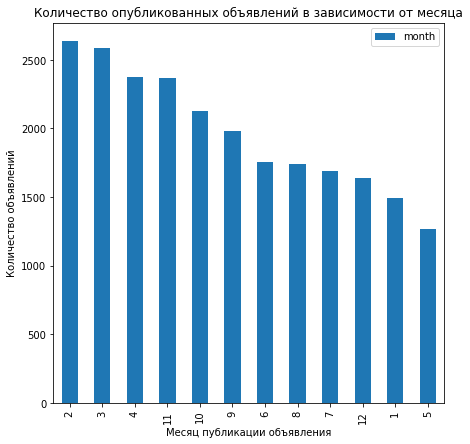

In [35]:
#месяц публикации объявления
data['month'].value_counts().plot.bar(figsize=(7, 7), legend=True)
plt.title('Количество опубликованных объявлений в зависимости от месяца')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество объявлений')

Больше всего объявлений о продаже недвижимости в феврале и марте. Меньше всего в мае. Однако в летние сезоны также заметен спад по самый сентябрь. Так же мало объявлений в декабре и январе. Вероятнее всего это связано с каникулами, праздниками и сезоном отпусков. 

#### Скорость продажи квартиры

Время продажи (медиана): 85 

Время продажи (среднее): 128 



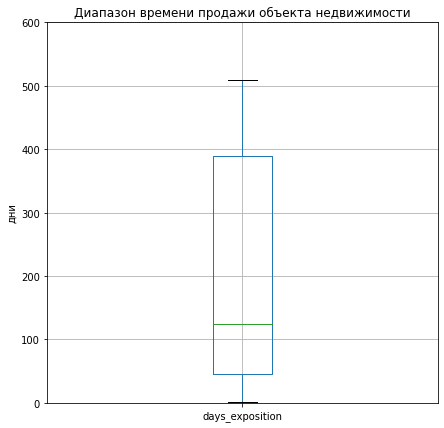

count    18790.000000
mean       128.276264
std        120.980920
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        509.000000
Name: days_exposition, dtype: float64

In [36]:
#заполню пустые значения маркером 9999
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)

print('Время продажи (медиана):', round(data.query('days_exposition != 9999')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 9999')['days_exposition'].mean()),'\n')

#Определение диапазона времени продажи квартир
data.boxplot(column='days_exposition', figsize=(7, 7))
plt.title('Диапазон времени продажи объекта недвижимости')
plt.ylim(0, 600)
plt.ylabel('дни')
plt.show()

data.query('days_exposition != 9999')['days_exposition'].describe()

##### Вывод
Медианное время продажи - 85 дней. 
Отличается на треть - 128 дней. Это значит, что большинство квартир продаются примерно за 3 месяца. 
Есть два пика 40 и 60 дней, это хороший срок продажи. Вероятно для однушек и двушек соответственно.
Есть аномальный пик при сроке продажи до 7 дней. 
Квартиры которые продаются более 200 дней можно назвать плохопродающимися.

#### Факторы влияющие на общую (полную) стоимость объекта

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


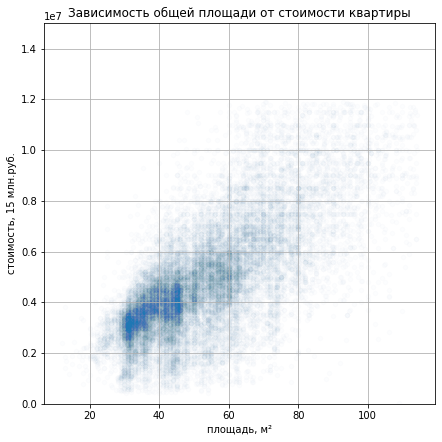

Корреляция общей площади к стоимости составляет: 0.6939002485197523


In [37]:
#график общей площади и стоимости квартиры
data.plot(x='total_area', y='last_price', grid=True, kind ='scatter', figsize=(7, 7), legend=True, alpha = 0.01)
plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 15 млн.руб.')
plt.ylim(0, 15000000)
plt.show()

print('Корреляция общей площади к стоимости составляет:', data['total_area'].corr(data['last_price']))

Стоимость квартиры растёт практически линейно вверх в зависимости от площади квартиры. Имеет высокую корреляцию

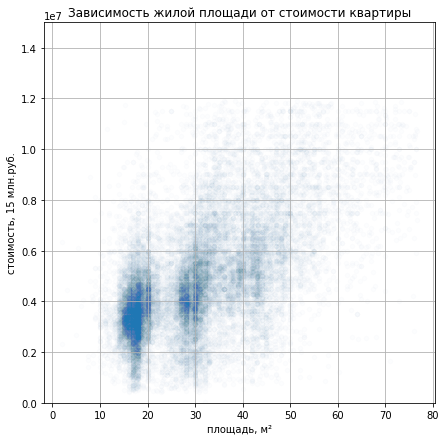

Корреляция жилой площади к стоимости составляет: 0.5737495577735716


In [38]:
#график общей площади и стоимости квартиры
data.plot(x='living_area', y='last_price', grid=True, kind ='scatter', figsize=(7, 7), legend=True, alpha = 0.01)
plt.title('Зависимость жилой площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 15 млн.руб.')
plt.ylim(0, 15000000)
plt.show()

print('Корреляция жилой площади к стоимости составляет:', data['living_area'].corr(data['last_price']))

Стоимость квартиры зависит от жилой площади, но не сильно. Корреляция чуть выше среднего.

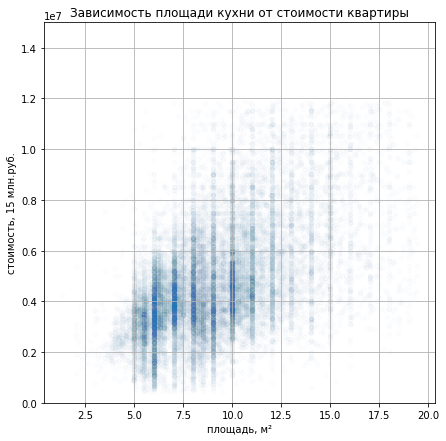

Корреляция площади кухни к стоимости составляет: 0.5096556022994246


In [39]:
#график площади кухни и стоимости квартиры
data.plot(x='kitchen_area', y='last_price', grid=True, kind ='scatter', figsize=(7, 7), legend=True, alpha = 0.01)
plt.title('Зависимость площади кухни от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 15 млн.руб.')
plt.ylim(0, 15000000)
plt.show()

print('Корреляция площади кухни к стоимости составляет:', data['kitchen_area'].corr(data['last_price']))

Стоимость квартиры зависит от площади кухни, но не сильно. Корреляция средняя. 

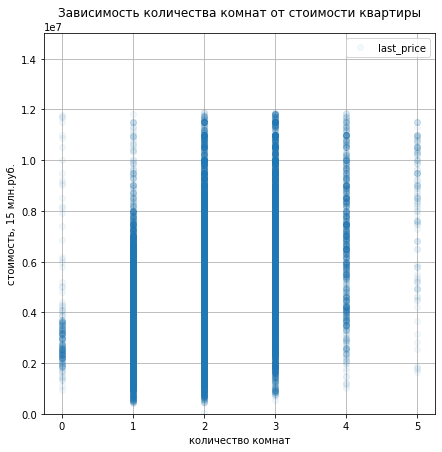

Корреляция количества комнат к стоимости составляет: 0.44379589961321736


In [40]:
#график количества комнат и стоимости квартиры
data.plot(x='rooms', y='last_price', grid=True, style ='o', figsize=(7, 7), legend=True, alpha=0.05)

#data['rooms'].value_counts().plot.bar(figsize=(7, 7), legend=True)
plt.title('Зависимость количества комнат от стоимости квартиры')
plt.xlabel('количество комнат')
plt.ylabel('стоимость, 15 млн.руб.')
plt.ylim(0, 15000000)
plt.show()

print('Корреляция количества комнат к стоимости составляет:', data['rooms'].corr(data['last_price']))

Цена от количества комнат слабо зависит, корреляция ниже среднего. 

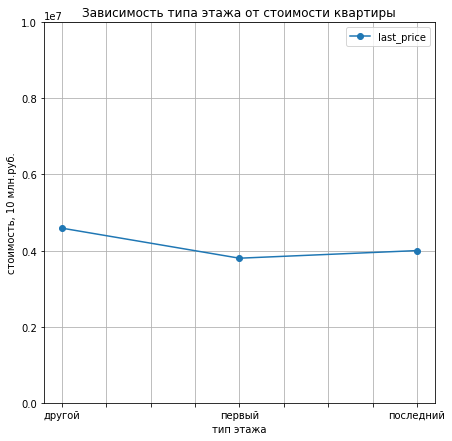

In [41]:
#график типа этажа и стоимости квартиры
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style ='o-', figsize=(7, 7), legend=True)
plt.title('Зависимость типа этажа от стоимости квартиры')
plt.xlabel('тип этажа')
plt.ylabel('стоимость, 10 млн.руб.')
plt.ylim(0, 10000000)
plt.show()


Квартиры на первом этаже самые дешевые. Чуть дороже на последнем. Самые дорогие между первыми последним этажом. 

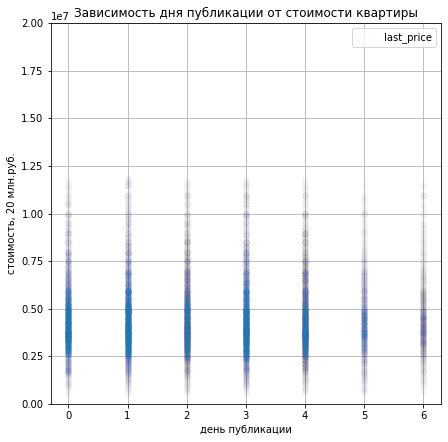

Корреляция дня размещения к стоимости составляет: -0.014317450998509383


In [42]:
data.plot(x = 'weekday', y = 'last_price', style='o', grid=True, figsize=(7, 7), alpha=0.005)
plt.title('Зависимость дня публикации от стоимости квартиры')
plt.xlabel('день публикации')
plt.ylabel('стоимость, 20 млн.руб.')
plt.ylim(0, 20000000)
plt.show()
print('Корреляция дня размещения к стоимости составляет:', data['weekday'].corr(data['last_price']))

Не зависит день размещения объявления от стоиомости квартиры. 

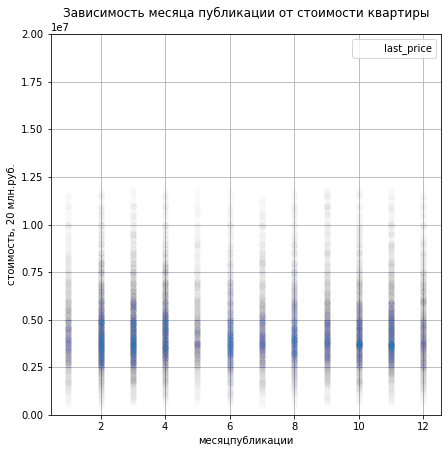

Корреляция дня размещения к стоимости составляет: 0.005493279564072182


In [44]:
data.plot(x = 'month', y = 'last_price', style='o', grid=True, figsize=(7, 7), alpha=0.005)
plt.title('Зависимость месяца публикации от стоимости квартиры')
plt.xlabel('месяцпубликации')
plt.ylabel('стоимость, 20 млн.руб.')
plt.ylim(0, 20000000)
plt.show()
print('Корреляция дня размещения к стоимости составляет:', data['month'].corr(data['last_price']))

Не зависит месяц размещения объявления от стоиомости квартиры. 

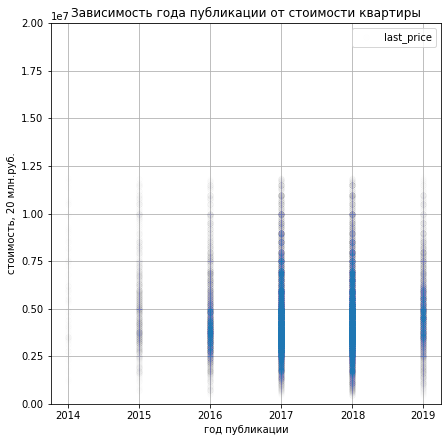

Корреляция дня размещения к стоимости составляет: -0.0019753074303708296


In [45]:
data.plot(x = 'year', y = 'last_price', style='o', grid=True, figsize=(7, 7), alpha=0.0025)
plt.title('Зависимость года публикации от стоимости квартиры')
plt.xlabel('год публикации')
plt.ylabel('стоимость, 20 млн.руб.')
plt.ylim(0, 20000000)
plt.show()
print('Корреляция дня размещения к стоимости составляет:', data['year'].corr(data['last_price']))

Также не зависит год размещения объявления от стоиомости квартиры. Однако видно что с 2017 года число объявлений о продаже квартир растёт. Небольшой спад в 2019 году

##### Вывод
**Общая площадь**
Чем больше общая площадь, тем выше стоимость квартиры. Зависимость очень похожа на прямую.
От 50м2 диапазон цен больше, до 50м2 стоимости примерно одинаковы. Это самая большая зависимость цены квартиры.

**Жилая площадь**
Чем больше жилая площадь, тем выше стоимость квартиры. Зависимость очень похожа на прямую.
Но более размыта, чем с общей площадью. От 50м2 жилой площади диапазон цен больше. 

**Площадь кухни**
Большинство квартир имеет кухни от 5 до 10м2. Цена от площади кухни зависит средне.

**Количество комнат**
Количество комнат влияет на цену также как и площадь кухни.

**Тип этажа**
На первом этаже самые дешевые квартиры, на последнем чуть дороже, самые дорогие между этими этажами. 

**Дата размещения**
Практически нет зависимости от даты размещения. Но в 2017-2018 годах цены более стабильные. И количество объявлений больше

####  Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [46]:
#Было. Средняя стоимость м2 в топ-10 населенных пунктах по количеству объявлений. 
top_10 = data['locality_name'].value_counts().head(10)
city_price_m2= data.query('locality_name in (@top_10.index)').pivot_table(values='price_m2', index='locality_name')
city_price_m2 = city_price_m2.astype(int)
city_price_m2.sort_values('price_m2', ascending=False)

,price_m2
locality_name,
Санкт-Петербург,105684
Пушкин,100462
Кудрово,95152
пок Парголово,90332
пок Мурино,85681
пок Шушары,78704
Колпино,75221
Гатчина,68664
Всеволожск,67222


In [47]:
#Стало. топ-10 по средней цене за м2
top10 = data.pivot_table(
    index='locality_name', values='price_m2', aggfunc=['mean', 'count', 'median']
    ).sort_values(by=('count', 'price_m2'), ascending=False).head(10)
top10.sort_values(by=('mean', 'price_m2'), ascending=False)

,mean,count,median
,price_m2,price_m2,price_m2
locality_name,,,
Санкт-Петербург,105684.892632,13606,102061.038770
Пушкин,100462.063435,336,98454.743209
Кудрово,95152.072198,470,95555.311677
пок Парголово,90332.263023,326,91780.224134
пок Мурино,85681.762601,556,85878.462169
пок Шушары,78704.891847,437,76829.268293
Колпино,75221.876295,335,74722.222222
Гатчина,68664.035870,303,67796.610169


##### Вывод
Самая большая стоимость непосредственно в Санкт-Петербурге (105 тысяч), далее Пушкин (100).
Самая низкая цена 58 тысяч в пригороде Выборг. 

#### Средняя цена каждого километра

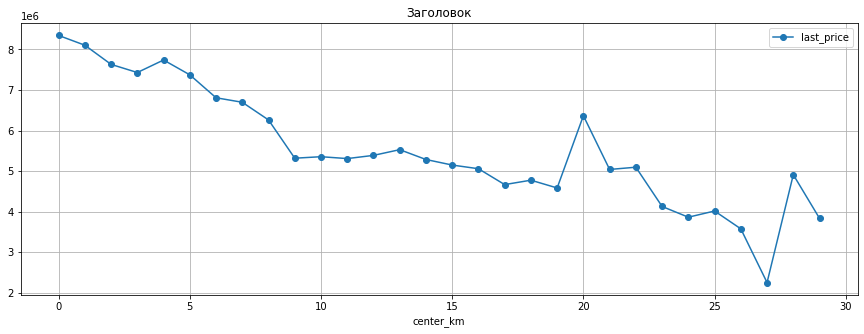

In [49]:
#Строю график с изменением цены зависимо от удалённости от Санкт-Петербурга
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_km', values='last_price')\
    .plot(grid=True, style='o-', figsize=(15, 5), title = 'Заголовок')
plt.show()

##### Вывод
Чем дальше от центра, тем ниже цена, тем не менее цена выравнивается при удалённости от 9км. 
Имеет пик приблеженный к 20км от центра на уровне 7км, далее снова на спад. 

### Общий вывод

#### Предобработка данных.
Данные я получила из источника '/datasets/real_estate_data.csv'. При первом рассмотрении обратила внимание на большое количество недостающих значений и некорректные типы данных. Проводить анализ без предварительно предобработки нельзя, так как можно получить неверные значения и сделать неверные выводы. 
После проведённой работы по исправлению типов данных, восполнению недостающих значений, удалений дубликатов, данные стали более правдоподобными благодаря тому, что в итоге из общего массива исключились повторы и аномальные значения, которые могут внести искажения в адекватную оценку рынка недвижимости.

#### Добавление дополнительных данных
Чтобы перейти к ответу на поставленные в целях исследования вопросах, было необходимо таблицу дополнить недостающими данными: 
1. цена квадратного метра, 
2. столбцы дней недели, месяцев и годов, 
3. добавила дополнительно столбец с типом этажа и 
4. расстояние до центра. 


#### Срок продажи квартиры

Как быстро продаются квартиры?


Чаще всего квартиру продают за 85 дней (3 месяца). Если меньше 60 дней, то это быстро, если дольше 200 дней - это долго.
Есть подозрительные квартиры, которые проданы менее чем за неделю. 
Есть квартиры, срок продажи которых около года. 
##### Рекоммендации
Имеет смысл рассматриватьть в качестве мошеннической деятельности "быструю" продажу менее чем за 7 дней.

#### Факторы, влияющие на стоимость

Какие факторы больше всего влияют на общую (полную) стоимость объекта?


На стоимость квартиры влияет общая площадь, жилая площадь, площадь кухни, количество комнат. Между ними достаточно высокая  зависимость. Чем больше площадь помещений, тем выше цена.
Первый и последний этажи самые дешевые. 
Практически нет зависимости от даты размещения. Но в 2017-2018 годах цены более стабильные и население активнее продавало недвижимость. 
##### Рекоммендации
Обратить внимание на квартиры с очень низкими потолками (менее 2м) или аномально-высокими. Они выглядят подозрительно. Это либо частные дома, либо помещения непригодные для проживания (подвалы, чердаки и пр). 

#### Стоимость квадратного метра в топ-10 населённых пунктов

Какие населённые пункты с самой высокой и низкой стоимостью квадратного метра?


Дороже всего квадратный метр в Санкт-Петербурге - 105686
Дешевле всего квадратный метр в Выборге - 58225
##### Рекоммендации
Обратить внимание на стоимость значительно ниже медианной для населенного пункта (минимум 1,200млн в самых отдалённых частях). Возможна мошенническая деятельность. 


#### Цена каждого километра от центра

Какая средняя цена каждого километра до центра?

Общая тенденция: чем дальше от центра, тем ниже цена. 
##### Рекоммендации
Имеет смысл принять за нормальное снижение цены удалённость от центра Санкт-Петербурга не более 9км. Если цены слишком высокие или слишком низкие и при этом рядом нет никаких значимых достопремичательносте